<a href="https://colab.research.google.com/github/hhhgraceyt/BDM_GZ/blob/master/Finance_Data_Analysis_Take_Home_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance Data Analysis Take Home Assessment

## Welcome!

Thank you for your interest in the Finance Analytics Engineer position at Comun and for taking the time to complete this assessment. This exercise is designed to simulate some of the analytical tasks involved in the role and give you a chance to showcase your skills with relevant data and tools.

\\

## Assessment Goal & Expectations

The primary goal is to evaluate your ability to work with financial data, specifically focusing on:

\\

**Data Exploration:** Loading data from CSV files provided via Google Drive and performing initial checks.

**SQL Proficiency:** Using SQL (via the DuckDB library in Python) to query, aggregate, filter, and join datasets to answer specific business questions. We are particularly interested in your ability to handle transaction data, time-series analysis, and combine different data sources.

**Analytical Thinking:** Interpreting the data and the results of your queries to derive meaningful insights.

**Python Integration (Optional but valued):** Using libraries like Pandas for data manipulation and Matplotlib/Seaborn for creating visualizations that support your analysis.

**Clarity & Communication:** Presenting your work clearly within this notebook, including well-commented code and concise explanations in Markdown where requested.

\\

We expect you to complete the tasks independently. Please focus on accuracy, the logic of your approach, and clear presentation.

\\

## Tools & Environment

- You will complete the assessment in this *Google Colab notebook*.
- Primary analysis should be done using SQL queries executed via the duckdb library within Python code cells. DuckDB allows querying CSV files directly.
- You may use pandas for data manipulation if needed, and matplotlib/seaborn for visualizations.
- Data files will be accessed from Google Drive.

\\

## Instructions & Submission

\\

- **Setup:** Create a copy of this notebook and save to your own Google Drive.
- **Complete Tasks:** Proceed through the notebook, completing the tasks in the designated code and Markdown cells. Ensure your code runs and the outputs are visible.
- **Save:** Save your completed notebook (File -> Save).
- **Submit:** Share the saved Colab notebook link with **piluski@comun.app** . Ensure sharing permissions are set to "Anyone with the link can view" or "Anyone with the link can comment". Also, Print the file as PDF and send to the same email (File -> Print).

\\

## Time Expectation

\\

We estimate this assessment will take approximately **2 hours** to complete. Focus on the quality and clarity of your work.

# Setup

In [ ]:
# Cell 1: Install Libraries
!pip install duckdb pandas matplotlib seaborn --quiet

In [ ]:
# Cell 2: Import Libraries
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
CSV_URL = 'https://drive.google.com/uc?export=download&id=1f-L_O5laInZrG30wP3_Vy-gu-u8q0pNY'
TABLE_NAME = 'atm_transactions'

con = duckdb.connect(database=':memory:', read_only=False)


create_table_query = f"""
CREATE OR REPLACE TABLE {TABLE_NAME} AS
SELECT *
FROM read_csv('{CSV_URL}');
"""

con.execute(create_table_query)

print(f"Table '{table_name}' created successfully in DuckDB.\n\n")

## EXAMPLE QUERY:
con.execute("""
  SELECT *
  FROM atm_transactions
  LIMIT 10
  """).fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Table 'atm_transactions' created successfully in DuckDB.






,CUSTOMER_ID,CUSTOMER_FIRST_TXN,TRANSACTION_TYPE,TRANSACTION_DATE_TIME,POST_DATE,SETTLE_DATE,TRANSACTION_AMOUNT
0,6bb6c7e74a78f575414827cbd75353c0e72162a60b0512...,2024-11-28 21:25:44,WITHDRAWAL,2024-12-24 16:15:48,2024-12-25 15:15:24,2024-12-25 15:15:01,-100.0
1,679336c9c0f400673c8cbeb5bbfacacd5d302dd6e84334...,2024-01-23 23:59:51,DEPOSIT,2024-02-06 21:33:25,2024-02-06 21:33:25,NaT,30.0
2,679336c9c0f400673c8cbeb5bbfacacd5d302dd6e84334...,2024-01-23 23:59:51,DEPOSIT,2024-01-23 23:59:51,2024-01-23 23:59:51,NaT,60.0
3,679336c9c0f400673c8cbeb5bbfacacd5d302dd6e84334...,2024-01-23 23:59:51,DEPOSIT,2024-02-18 21:32:46,2024-02-18 21:32:46,NaT,70.0
4,679336c9c0f400673c8cbeb5bbfacacd5d302dd6e84334...,2024-01-23 23:59:51,DEPOSIT,2024-02-23 23:53:19,2024-02-23 23:53:19,NaT,100.0
5,098afea21a7d18254fd2ff97b3f2a832fa9cdc57dd51a3...,2024-10-04 00:26:17,WITHDRAWAL,2024-10-17 03:16:01,2024-10-18 14:13:55,2024-10-18 14:13:36,-200.0
6,098afea21a7d18254fd2ff97b3f2a832fa9cdc57dd51a3...,2024-10-04 00:26:17,DEPOSIT,2024-11-30 04:22:57,2024-11-30 04:22:57,NaT,200.0
7,098afea21a7d18254fd2ff97b3f2a832fa9cdc57dd51a3...,2024-10-04 00:26:17,DEPOSIT,2024-11-09 01:46:48,2024-11-09 01:46:48,NaT,300.0
8,098afea21a7d18254fd2ff97b3f2a832fa9cdc57dd51a3...,2024-10-04 00:26:17,WITHDRAWAL,2024-10-11 16:33:27,2024-10-12 14:14:38,2024-10-12 14:14:05,-20.0
9,098afea21a7d18254fd2ff97b3f2a832fa9cdc57dd51a3...,2024-10-04 00:26:17,DEPOSIT,2024-12-02 16:39:58,2024-12-02 16:39:58,NaT,706.0


# Question 1:

You have been provided with a dataset containing ATM transaction records. Please explore this data and list any interesting facts, patterns, or behaviors you observe. Feel free to use SQL queries to investigate different aspects of the data. Document your findings and briefly explain why you found them noteworthy



# Question 2:

Currently, our platform does not charge any fees for the transaction types present in the dataset (withdrawals and deposits). Below is a table outlining our internal cost per transaction type:

\\

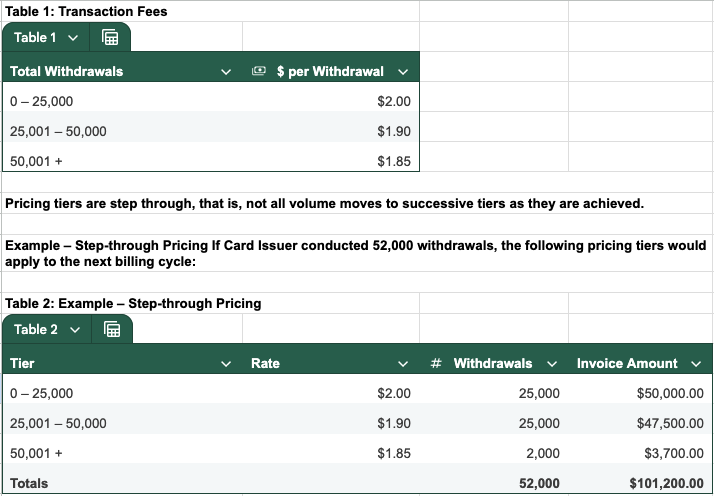

\\

Each deposit is charged $0.85 + 0.35% of Deposit Amount.

\\

a) Considering our target gross margin is 50%, calculate the fee we should charge customers for each transaction type.

b) Following your calculations, please provide your opinion on whether implementing these fees makes business sense at this time. Justify your answer with clear arguments.

# Question 3:

You are tasked with reconciling our internal transaction-level data with the money movements reflected in our bank accounts. To assist you, we have provided a screenshot of the money movements related to ATMs, as well as a summary report from our payment processor for two specific dates (December 16th and 17th, 2024).

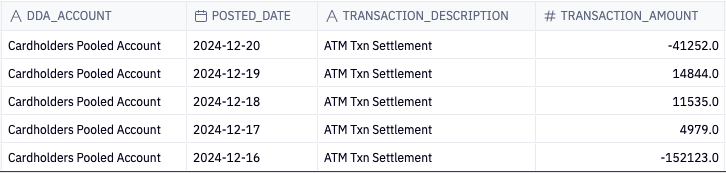

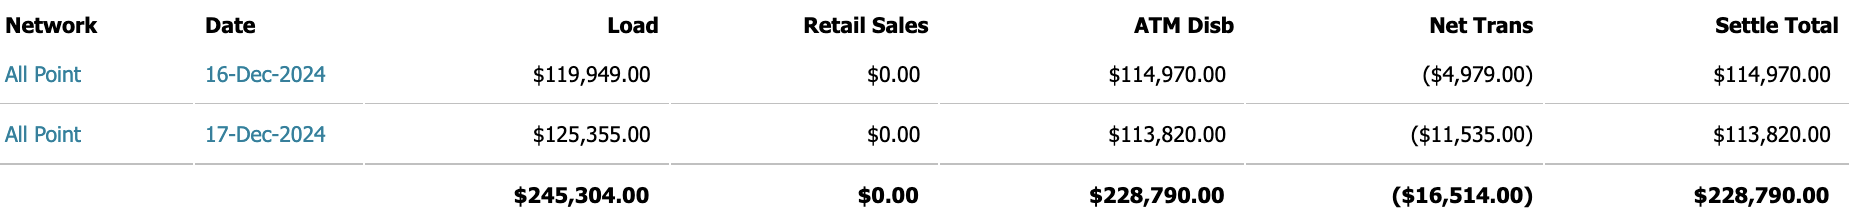

By comparing the transaction-level data with the provided processor summary report, your goal is to uncover the rules and logic applied to the transaction data to arrive at the aggregated money movement figures reported by the processor.

Please detail the rules you identify, explaining how different transaction types appear to be aggregated.

Furthermore, if you discover any discrepancies between the two datasets, provide a clear explanation for these differences, justifying your reasoning based on the data available and the rules you have identified.